# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

In [4]:
df_data.shape # (962,16)

(962, 16)

In [5]:
df_data # First-->1901 , Last-->2020



year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name  birth_date  \
0      Individual  Jacobus Henricus van 't Hoff  1852-08-30   
1      Individual               Sully Prudhomme  1839-03-16   
2      Individual        Emil Adolf von Behring  1854-03-15   
3      Individual                Frédéric Passy  1822-05-20   
4      Individual             Jean Henry Dunant  1828-05-08   
..            ...                           ...         ...   
957    Individual              Michael Houghton  1949-07-02   
958  Organization    World Food Programme (WFP)         NaN   
959    Individual                   Andrea Ghez  1965-06-16   
960    Individual               Reinhard Genzel  1952-03-24   
961    Individual                 Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization

### Check for Duplicates

In [6]:
duplicate_rows = df_data[df_data.duplicated()]
len(duplicate_rows) # 0

df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

- The analysis below shows the birth date and the organisation's name have NaN because the laureate type is organisation and full_name col has organisation name

In [7]:
df_data.loc[df_data.birth_date.isna()][['year','category', 'laureate_type','birth_date','full_name', 'organization_name']]

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Organization        NaN   
778  2005    Peace  Organization        NaN   
788  2006    Peace  Organization        NaN   
801  2007    Peace  Organization        NaN   
860  2012    Peace  Organization        NaN   
873  2013    Peace  Organization        NaN   
897  2015    Peace  Organization        NaN   
919  2017    Peace  Organization        NaN   
958  2020    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

- Since the category type of all individuals are not affiliated to any particular org,thus they has org NaN


In [8]:
df_data.loc[df_data.organization_name.isna()][['year','category', 'laureate_type','birth_date','full_name', 'organization_name']]

year    category laureate_type  birth_date  \
1    1901  Literature    Individual  1839-03-16   
3    1901       Peace    Individual  1822-05-20   
4    1901       Peace    Individual  1828-05-08   
7    1902  Literature    Individual  1817-11-30   
9    1902       Peace    Individual  1843-05-21   
..    ...         ...           ...         ...   
932  2018       Peace    Individual  1993-07-02   
942  2019  Literature    Individual  1942-12-06   
946  2019       Peace    Individual  1976-08-15   
954  2020  Literature    Individual  1943-04-22   
958  2020       Peace  Organization         NaN   

                              full_name organization_name  
1                       Sully Prudhomme               NaN  
3                        Frédéric Passy               NaN  
4                     Jean Henry Dunant               NaN  
7    Christian Matthias Theodor Mommsen               NaN  
9                  Charles Albert Gobat               NaN  
..                                  ...               ...  
932                         Nadia Murad               NaN  
942                        Peter Handke               NaN  
946                      Abiy Ahmed Ali               NaN  
954                        Louise Glück               NaN  
958          World Food Programme (WFP)               NaN  

[255 rows x 6 columns]

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [9]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
type(df_data.birth_date[1])


pandas._libs.tslibs.timestamps.Timestamp

#### Add a Column with the Prize Share as a Percentage

In [10]:
type(df_data.prize_share[1])

str

In [11]:
splitting = df_data['prize_share'].str.split('/',expand=True)
up = pd.to_numeric(splitting[0])
down = pd.to_numeric(splitting[1])

df_data['share_pct'] = up/down



df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

In [12]:
male_female_ratio = df_data.sex.value_counts()

In [13]:
donut = px.pie(labels=male_female_ratio.index,
       values=male_female_ratio.values,
       title='Male and Female Ratio',
       names=male_female_ratio.index,
       hole=0.5)
donut.update_traces(textinfo='percent+label',textposition='outside',textfont_size=14)
donut.show()


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [14]:
df_female = df_data[df_data.sex=='Female']
df_female_3 = df_female.sort_values('year')[:3]

In [15]:
df_female_3[['year','category','birth_country','organization_name']]

year    category                     birth_country organization_name
18  1903     Physics           Russian Empire (Poland)               NaN
29  1905       Peace  Austrian Empire (Czech Republic)               NaN
51  1909  Literature                            Sweden               NaN

# Find the Repeat Winners


-- Below I have used two approaches to query the result: First,using the value counts and the .loc[]. Next, using the lambda function to filter out on the row-level

In [16]:
multiple_winners = df_data.full_name.value_counts()[df_data.full_name.value_counts()>1].index

df_data.loc[df_data['full_name'].isin(multiple_winners)]

year   category                              prize  \
18   1903    Physics    The Nobel Prize in Physics 1903   
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
89   1917      Peace         The Nobel Peace Prize 1917   
215  1944      Peace         The Nobel Peace Prize 1944   
278  1954  Chemistry  The Nobel Prize in Chemistry 1954   
283  1954      Peace         The Nobel Peace Prize 1954   
297  1956    Physics    The Nobel Prize in Physics 1956   
306  1958  Chemistry  The Nobel Prize in Chemistry 1958   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
18   "in recognition of the extraordinary services ...         1/4   
62   "in recognition of her services to the advance...         1/1   
89                                                 NaN         1/1   
215                                                NaN         1/1   
278  "for his research into the nature of the chemi...         1/1   
283                                                NaN         1/1   
297  "for their researches on semiconductors and th...         1/3   
306  "for his work on the structure of proteins, es...         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
18     Individual                        Marie Curie, née Sklodowska   
62     Individual                        Marie Curie, née Sklodowska   
89   Organization  Comité international de la Croix Rouge (Intern...   
215  Organization  Comité international de la Croix Rouge (Intern...   
278    Individual                                 Linus Carl Pauling   
283  Organization  Office of the United Nations High Commissioner...   
297    Individual                                       John Bardeen   
306    Individual                                   Frederick Sanger   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
18  1867-11-07        Warsaw   Russian Empire (Poland)   
62  1867-11-07        Warsaw   Russian Empire (Poland)   
89         NaT           NaN                       NaN   
215        NaT           NaN                       NaN   
278 1901-02-28  Portland, OR  United States of America   
283        NaT           NaN                       NaN   
297 1908-05-23   Madison, WI  United States of America   
306 1918-08-13     Rendcombe            United Kingdom   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
18                     Poland  Female   
62                     Poland  Female   
89                        NaN     NaN   
215                       NaN     NaN   
278  United States of America    Male   
283                       NaN     NaN   
297  United States of America    Male   
306            United Kingdom    Male   
340  U

In [17]:
df_data.groupby('full_name').filter(lambda x: len(x)>1)

year   category                              prize  \
18   1903    Physics    The Nobel Prize in Physics 1903   
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
89   1917      Peace         The Nobel Peace Prize 1917   
215  1944      Peace         The Nobel Peace Prize 1944   
278  1954  Chemistry  The Nobel Prize in Chemistry 1954   
283  1954      Peace         The Nobel Peace Prize 1954   
297  1956    Physics    The Nobel Prize in Physics 1956   
306  1958  Chemistry  The Nobel Prize in Chemistry 1958   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
18   "in recognition of the extraordinary services ...         1/4   
62   "in recognition of her services to the advance...         1/1   
89                                                 NaN         1/1   
215                                                NaN         1/1   
278  "for his research into the nature of the chemi...         1/1   
283                                                NaN         1/1   
297  "for their researches on semiconductors and th...         1/3   
306  "for his work on the structure of proteins, es...         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
18     Individual                        Marie Curie, née Sklodowska   
62     Individual                        Marie Curie, née Sklodowska   
89   Organization  Comité international de la Croix Rouge (Intern...   
215  Organization  Comité international de la Croix Rouge (Intern...   
278    Individual                                 Linus Carl Pauling   
283  Organization  Office of the United Nations High Commissioner...   
297    Individual                                       John Bardeen   
306    Individual                                   Frederick Sanger   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
18  1867-11-07        Warsaw   Russian Empire (Poland)   
62  1867-11-07        Warsaw   Russian Empire (Poland)   
89         NaT           NaN                       NaN   
215        NaT           NaN                       NaN   
278 1901-02-28  Portland, OR  United States of America   
283        NaT           NaN                       NaN   
297 1908-05-23   Madison, WI  United States of America   
306 1918-08-13     Rendcombe            United Kingdom   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
18                     Poland  Female   
62                     Poland  Female   
89                        NaN     NaN   
215                       NaN     NaN   
278  United States of America    Male   
283                       NaN     NaN   
297  United States of America    Male   
306            United Kingdom    Male   
340  U

# Number of Prizes per Category

In [18]:
number_of_category = df_data.category.value_counts()

In [19]:
bar = px.bar(
    number_of_category,
    x=number_of_category.index,
    y=number_of_category.values,
    title='Prize by Category',
    labels={'x': 'Category', 'Count': 'Number of prizes'},
    color=number_of_category.values, 
    color_continuous_scale=px.colors.sequential.Aggrnyl
)

bar.update_layout(
    xaxis_title='Category',
    yaxis_title='Number of Prizes',
    title_font_size=20,
    title_x=0.5,
    xaxis_tickangle=-45,  
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [20]:
economics = df_data[df_data.category=='Economics']
economics[['year','full_name','category']]

year          full_name   category
393  1969      Jan Tinbergen  Economics
394  1969      Ragnar Frisch  Economics
402  1970  Paul A. Samuelson  Economics
411  1971      Simon Kuznets  Economics
419  1972      John R. Hicks  Economics
..    ...                ...        ...
939  2019   Abhijit Banerjee  Economics
940  2019       Esther Duflo  Economics
941  2019     Michael Kremer  Economics
952  2020    Paul R. Milgrom  Economics
953  2020   Robert B. Wilson  Economics

[86 rows x 3 columns]

# Male and Female Winners by Category


In [21]:
sex_wise_category = df_data.groupby(['category','sex'],as_index=False).agg({'prize':pd.Series.count})

In [22]:
sex_wise_category.sort_values('prize',ascending=False,inplace=True)

In [23]:
bar = px.bar(
    sex_wise_category,
    x='category',
    y='prize',
    title='Male and Female Prizes per Category',
    color='sex',
    # barmode='group'
)

bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Prizes',
                    # xaxis={'categoryorder':'total descending'},
                    # yaxis={'range':[0,200]}
                  )
bar.show()

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Number of Prizes Awarded Over Time

In [24]:
prize_per_year = df_data.groupby('year').count().prize

In [25]:
rolling_prizes = prize_per_year.rolling(window=5).mean()

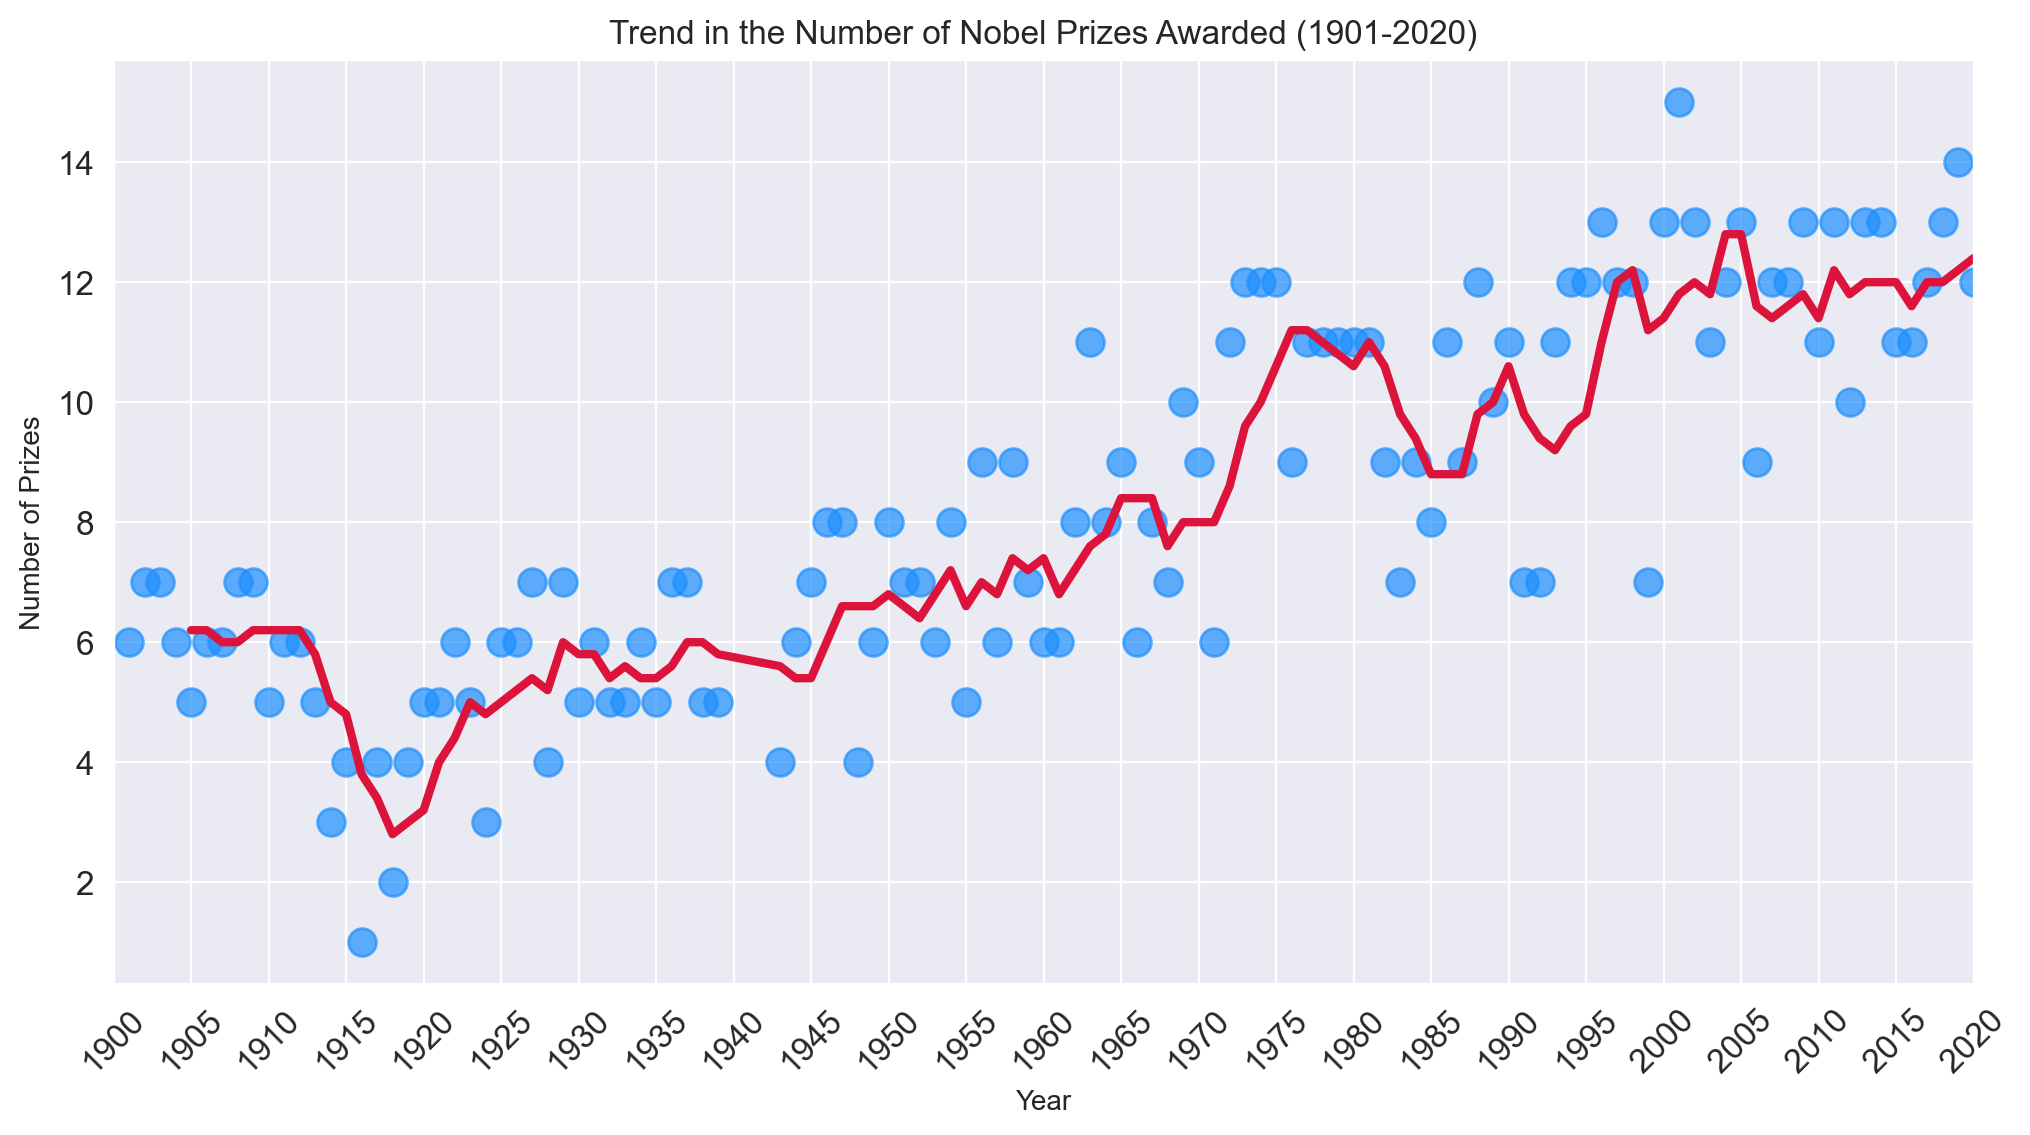

In [26]:
plt.figure(figsize=(12,6),dpi=200)
plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_per_year.index, 
        rolling_prizes.values, 
        c='crimson', 
        linewidth=3,)

years = np.arange(1900, 2021, 5)
plt.xticks(years, rotation=45,fontsize=12)
plt.yticks(fontsize=12)


plt.xlim(1900,2020)

plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Trend in the Number of Nobel Prizes Awarded (1901-2020)')




plt.show()

# Are More Prizes Shared Than Before?


In [27]:
prize_share_per_year = df_data.groupby('year').count().prize_share

In [28]:
rolling_prizes_share = prize_share_per_year.rolling(window=5).mean()

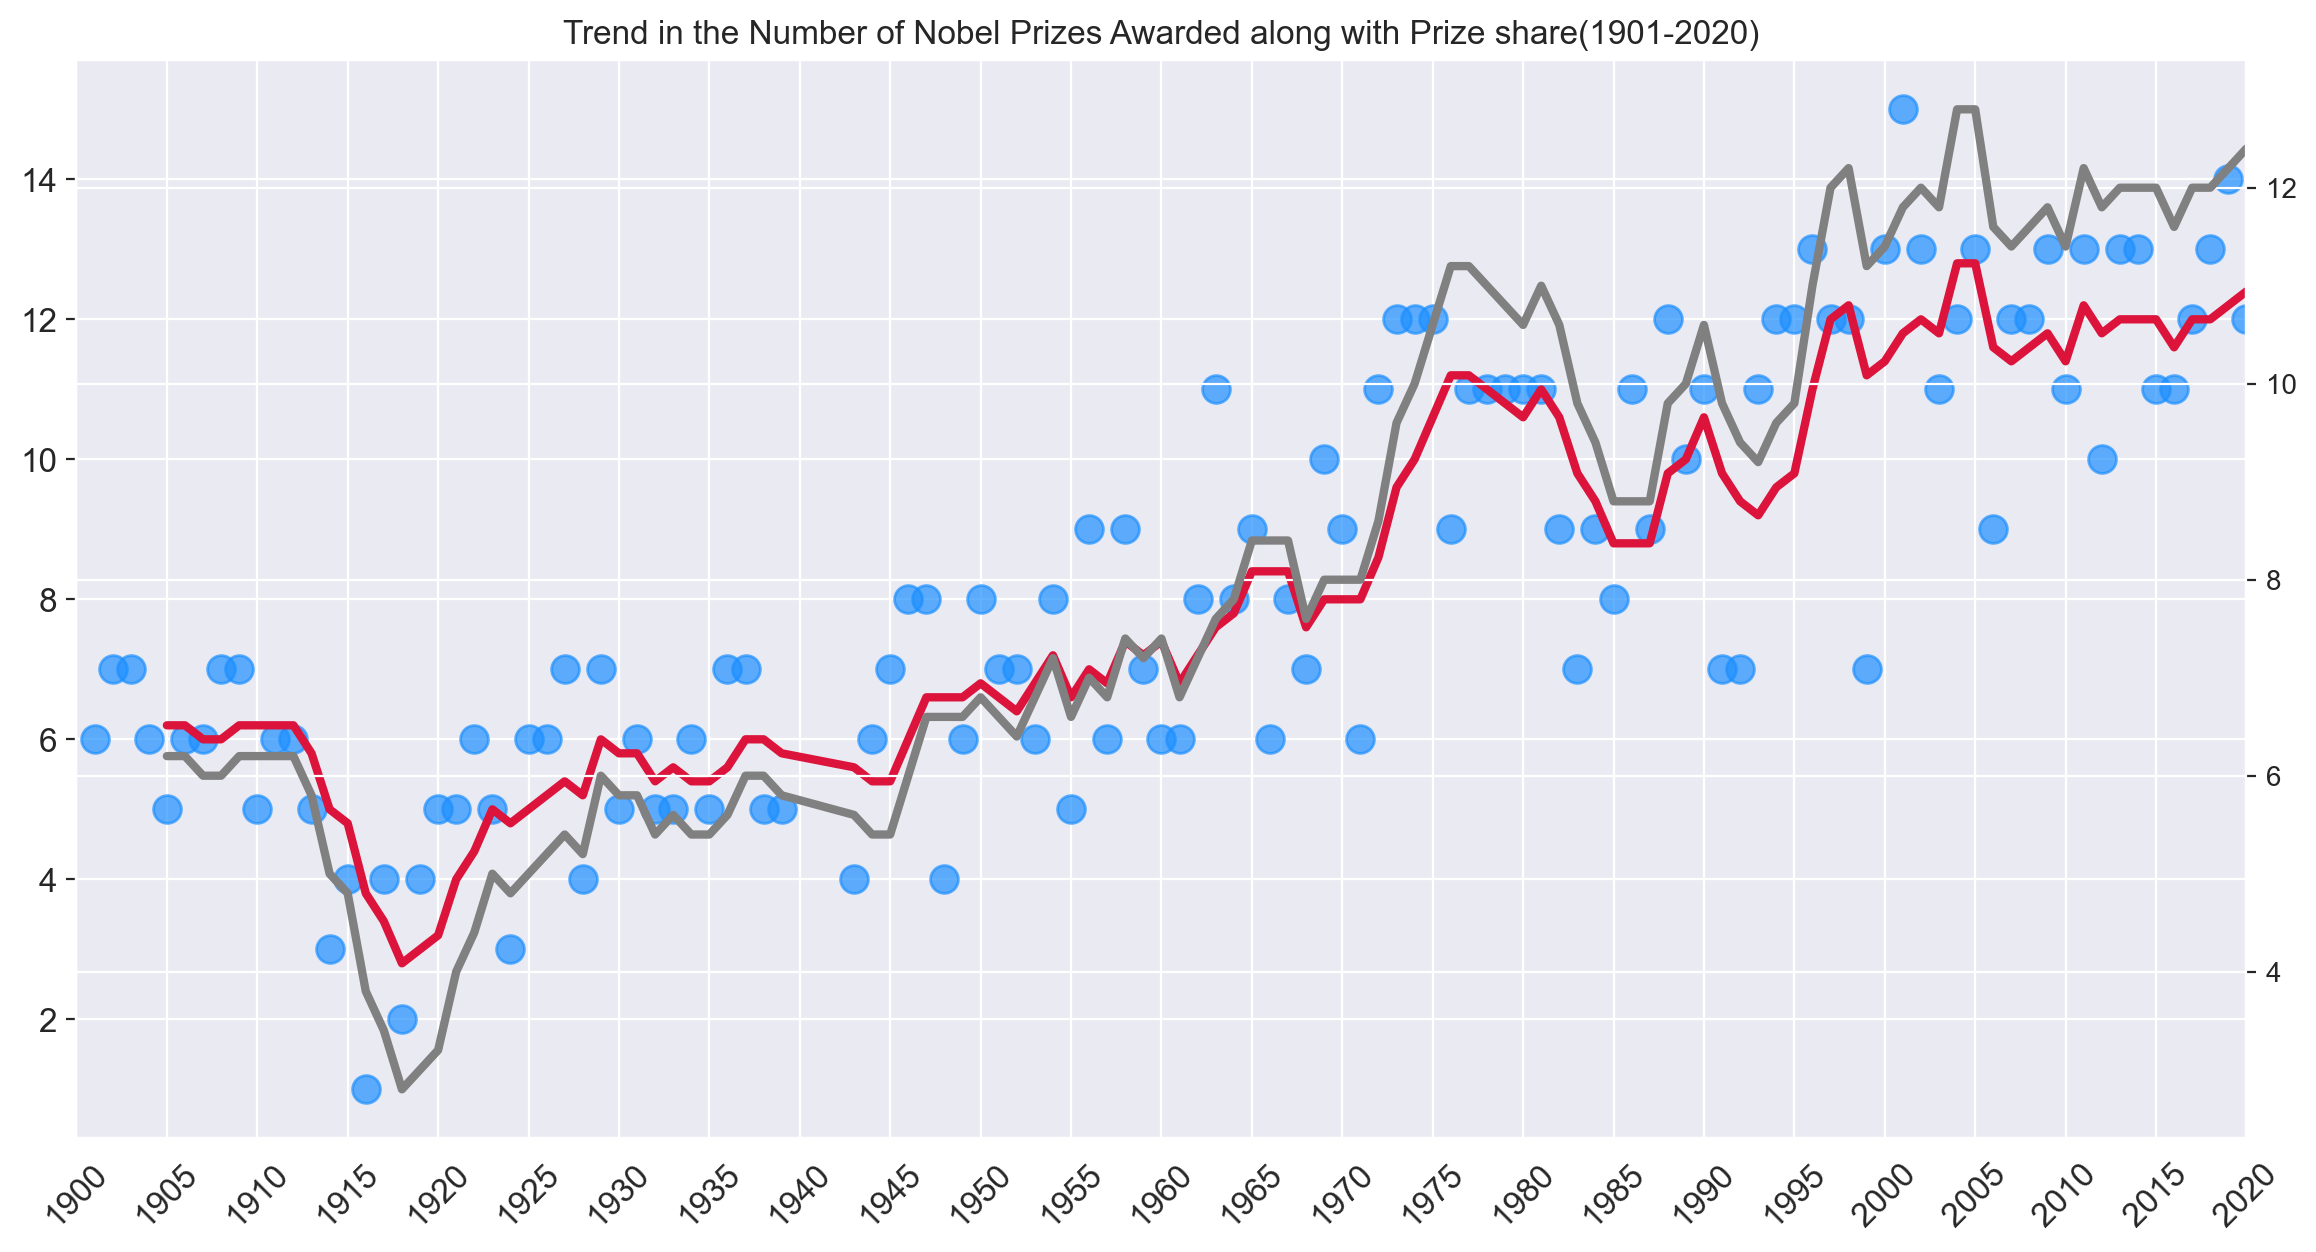

In [29]:
plt.figure(figsize=(14,7),dpi=200)

years = np.arange(1900, 2021, 5)
plt.xticks(years, rotation=45,fontsize=12)
plt.yticks(fontsize=12)

ax1 = plt.gca()
ax1.set_xlim(1900,2020)

ax2 = ax1.twinx()
# ax2.invert_yaxis() # for inversion


ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        rolling_prizes.values, 
        c='crimson', 
        linewidth=3,)

 
ax2.plot(prize_share_per_year.index, 
        rolling_prizes_share.values, 
        c='grey', 
        linewidth=3,)
plt.title('Trend in the Number of Nobel Prizes Awarded along with Prize share(1901-2020)')



plt.show()

# The Countries with the Most Nobel Prizes

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [30]:
top_20_countries = df_data.groupby('birth_country').size().reset_index(name='prize')


top_20_countries = top_20_countries.sort_values('prize',ascending=False)[:20]

In [31]:
h_bar = px.bar(x = top_20_countries.prize,
               y = top_20_countries.birth_country,
               orientation='h')
h_bar.update_layout(xaxis_title='Number of Prizes', yaxis_title='Birth Country')
h_bar.show()

# Choropleth Map to Show the Number of Prizes Won by top 20 Country


In [32]:
top20_countries_iso = df_data.groupby(['ISO','birth_country']).size().reset_index(name='prize') 

top20_countries_iso = top20_countries_iso.sort_values('prize',ascending=False).head(20)

top20_countries_iso

ISO             birth_country  prize
118  USA  United States of America    281
49   GBR            United Kingdom     91
29   DEU                   Germany     65
45   FRA                    France     54
109  SWE                    Sweden     29
70   JPN                     Japan     27
15   CAN                    Canada     20
16   CHE               Switzerland     19
87   NLD               Netherlands     18
68   ITA                     Italy     17
104  RUS                    Russia     17
2    AUT                   Austria     15
88   NOR                    Norway     12
36   DNK                   Denmark     11
18   CHN                     China     11
1    AUS                 Australia     10
6    BEL                   Belgium      9
122  ZAF              South Africa      9
48   GBR                  Scotland      9
96   POL          Germany (Poland)      8

In [33]:
fig = px.choropleth(
    top20_countries_iso,
    locations='ISO',
    locationmode='ISO-3',
    color='prize',
    hover_name='ISO',
    color_continuous_scale='Reds',  
    labels={'prize': 'Number of Nobel Prizes'},
    template='plotly_dark'  
)

# Customize layout
fig.update_layout(
    geo=dict(
        showcoastlines=True, 
    ),
    coloraxis_colorbar=dict(
        title='Prizes',  
    )
)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


# In Which Categories are the Different Countries Winning Prizes? 



In [34]:
country_wise_cat_prizes = df_data.groupby(['birth_country','category'],as_index=False).agg({'prize':pd.Series.count})

In [35]:
merged_df = pd.merge(country_wise_cat_prizes,top_20_countries,on='birth_country')

merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']

merged_df.sort_values('total_prize',inplace=True)

merged_df

birth_country_current    category  cat_prize  total_prize
47                      India     Physics          1            8
46                      India       Peace          1            8
45                      India    Medicine          2            8
44                      India  Literature          1            8
43                      India   Economics          2            8
..                        ...         ...        ...          ...
103  United States of America  Literature         10          281
105  United States of America       Peace         19          281
101  United States of America   Chemistry         55          281
102  United States of America   Economics         49          281
106  United States of America     Physics         70          281

[107 rows x 4 columns]

In [36]:

bar = px.bar(x=merged_df.cat_prize,y=merged_df.birth_country_current,
                    hover_name=merged_df.category,color=merged_df.category,color_continuous_scale='Agsunset',
                    title='Country Wise Prize Distribution')
bar.update_layout(xaxis_title='Number of Prizes',
                  yaxis_title='Countries',xaxis=dict(type='log'),
                  coloraxis_showscale=False)
bar.show()


/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [37]:
country_wise_prize = df_data.groupby(['birth_country_current','year'],as_index=False).count()
country_wise_prize = country_wise_prize.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [38]:
country_wise_prize

year     birth_country_current  prize
118  1901                    France      2
346  1901                    Poland      1
159  1901                   Germany      1
312  1901               Netherlands      1
440  1901               Switzerland      1
..    ...                       ...    ...
31   2019                   Austria      1
221  2020                   Germany      1
622  2020  United States of America      7
533  2020            United Kingdom      2
158  2020                    France      1

[627 rows x 3 columns]

In [39]:
cumulative_prizes = country_wise_prize.groupby(by=['birth_country_current','year']).sum()
cumulative_prizes = cumulative_prizes.groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

cumulative_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [40]:

line = px.line(
    cumulative_prizes,
    x='year',
    y='prize',
    color='birth_country_current',
    hover_name='birth_country_current',
    title='Cumulative Number of Nobel Prizes by Country'
)


line.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Prizes',
    xaxis=dict(
        tickmode='linear',
        tick0=1900,
        dtick=5
    ),
    template='plotly_white'
)

line.show()



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# What are the Top Research Organisations?

In [41]:
top_organisations = df_data.groupby('organization_name',as_index=False).agg({'prize':pd.Series.count})

In [42]:
top_organisations = top_organisations.sort_values('prize',ascending=False).head(20)

In [43]:
top_organisations

organization_name  prize
196                      University of California     40
68                             Harvard University     29
167                           Stanford University     23
117   Massachusetts Institute of Technology (MIT)     21
198                         University of Chicago     20
197                       University of Cambridge     18
26   California Institute of Technology (Caltech)     17
38                            Columbia University     17
146                          Princeton University     15
152                        Rockefeller University     13
119                           Max-Planck-Institut     13
222                          University of Oxford     12
111           MRC Laboratory of Molecular Biology     10
258                               Yale University      9
40                             Cornell University      8
12                              Bell Laboratories      8
109                             London University      7
163                           Sorbonne University      7
67                         Harvard Medical School      7
192                     University College London      7

In [44]:
bar = px.bar(
    top_organisations,
    x=top_organisations.organization_name,
    y=top_organisations.prize,
    title='Organisations by Prizes',
    labels={'x': 'organisations', 'Count': 'Number of prizes'},
    color=top_organisations.organization_name, 
    color_continuous_scale=px.colors.sequential.Aggrnyl
)

bar.update_layout(
    xaxis_title='Organisations',
    yaxis_title='Number of Prizes',
    title_font_size=20,
    title_x=0.5,
    xaxis_tickangle=-45,  
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

bar.show()

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Which Cities Make the Most Discoveries? 

In [45]:
top_cities_organisations = df_data.organization_city.value_counts()[:20]

In [46]:
top_cities_organisations.sort_values(ascending=False,inplace=True)

In [47]:
org_bar = px.bar(x = top_cities_organisations.values,
                 y = top_cities_organisations.index,
                 orientation='h',
                 color=top_cities_organisations.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions Cities by Number of Prizes')
 
org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution on Cities',
                      coloraxis_showscale=False)
org_bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

In [48]:
top_birth_cities = df_data.birth_city.value_counts()[:20]
top_birth_cities.sort_values(ascending=False,inplace=True)

In [49]:
birth_bar = px.bar(x = top_birth_cities.values,
                 y = top_birth_cities.index,
                 orientation='h',
                 color=top_birth_cities.values,
                 color_continuous_scale=px.colors.sequential.Plasma,
                 title='Top 20 Birth Cities by Number of Prizes')
 
birth_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Birth Cities',
                      coloraxis_showscale=False)
birth_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [50]:
country_org = df_data.groupby(['organization_name','organization_city','organization_country'],as_index=False).agg({'prize':pd.Series.count})
country_org.sort_values('prize',ascending=False,inplace=True)

country_org

organization_name organization_city  \
71                                  Harvard University     Cambridge, MA   
185                                Stanford University      Stanford, CA   
121        Massachusetts Institute of Technology (MIT)     Cambridge, MA   
222                              University of Chicago       Chicago, IL   
215                           University of California      Berkeley, CA   
..                                                 ...               ...   
120                 Marine Biological Laboratory (MBL)    Woods Hole, MA   
122                                Max-Planck Institut            Berlin   
124                                Max-Planck Institut        Heidelberg   
125                                Max-Planck-Institut            Berlin   
290  École municipale de physique et de chimie indu...             Paris   

         organization_country  prize  
71   United States of America     29  
185  United States of America     23  
121  United States of America     21  
222  United States of America     20  
215  United States of America     19  
..                        ...    ...  
120  United States of America      1  
122                   Germany      1  
124                   Germany      1  
125                   Germany      1  
290                    France      1  

[291 rows x 4 columns]

In [51]:
sun = px.sunburst(country_org,
            path=['organization_name','organization_city','organization_country'],
            values='prize',
            title='Organisations/Prize',
                   )
 
sun.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)

# Patterns in the Laureate Age at the Time of the Award


In [52]:
type(df_data.birth_date[1])

pandas._libs.tslibs.timestamps.Timestamp

In [53]:
df_data['winning_age'] = df_data.year - df_data['birth_date'].dt.year

In [54]:
df_data[['birth_date','year','full_name','winning_age']]

birth_date  year                     full_name  winning_age
0   1852-08-30  1901  Jacobus Henricus van 't Hoff        49.00
1   1839-03-16  1901               Sully Prudhomme        62.00
2   1854-03-15  1901        Emil Adolf von Behring        47.00
3   1822-05-20  1901                Frédéric Passy        79.00
4   1828-05-08  1901             Jean Henry Dunant        73.00
..         ...   ...                           ...          ...
957 1949-07-02  2020              Michael Houghton        71.00
958        NaT  2020    World Food Programme (WFP)          NaN
959 1965-06-16  2020                   Andrea Ghez        55.00
960 1952-03-24  2020               Reinhard Genzel        68.00
961 1931-08-08  2020                 Roger Penrose        89.00

[962 rows x 4 columns]

### Who were the oldest and youngest winners?

In [55]:
df_data.loc[df_data.winning_age.idxmin()]

year                                                                  2014
category                                                             Peace
prize                                           The Nobel Peace Prize 2014
motivation               "for their struggle against the suppression of...
prize_share                                                            1/2
laureate_type                                                   Individual
full_name                                                 Malala Yousafzai
birth_date                                             1997-07-12 00:00:00
birth_city                                                         Mingora
birth_country                                                     Pakistan
birth_country_current                                             Pakistan
sex                                                                 Female
organization_name                                                      NaN
organization_city        

In [56]:
df_data.loc[df_data.winning_age.idxmax()]

year                                                               2019
category                                                      Chemistry
prize                                 The Nobel Prize in Chemistry 2019
motivation               “for the development of lithium-ion batteries”
prize_share                                                         1/3
laureate_type                                                Individual
full_name                                               John Goodenough
birth_date                                          1922-07-25 00:00:00
birth_city                                                         Jena
birth_country                                                   Germany
birth_country_current                                           Germany
sex                                                                Male
organization_name                                   University of Texas
organization_city                                             Au

In [57]:
df_data.describe()

year                     birth_date  share_pct  winning_age
count   962.00                            934     962.00       934.00
mean  1,971.82  1912-03-28 22:50:37.259100672       0.63        59.95
min   1,901.00            1817-11-30 00:00:00       0.25        17.00
25%   1,948.00            1892-04-06 00:00:00       0.33        51.00
50%   1,977.00            1917-10-30 12:00:00       0.50        60.00
75%   2,001.00            1937-04-24 18:00:00       1.00        69.00
max   2,020.00            1997-07-12 00:00:00       1.00        97.00
std      33.81                            NaN       0.29        12.62

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



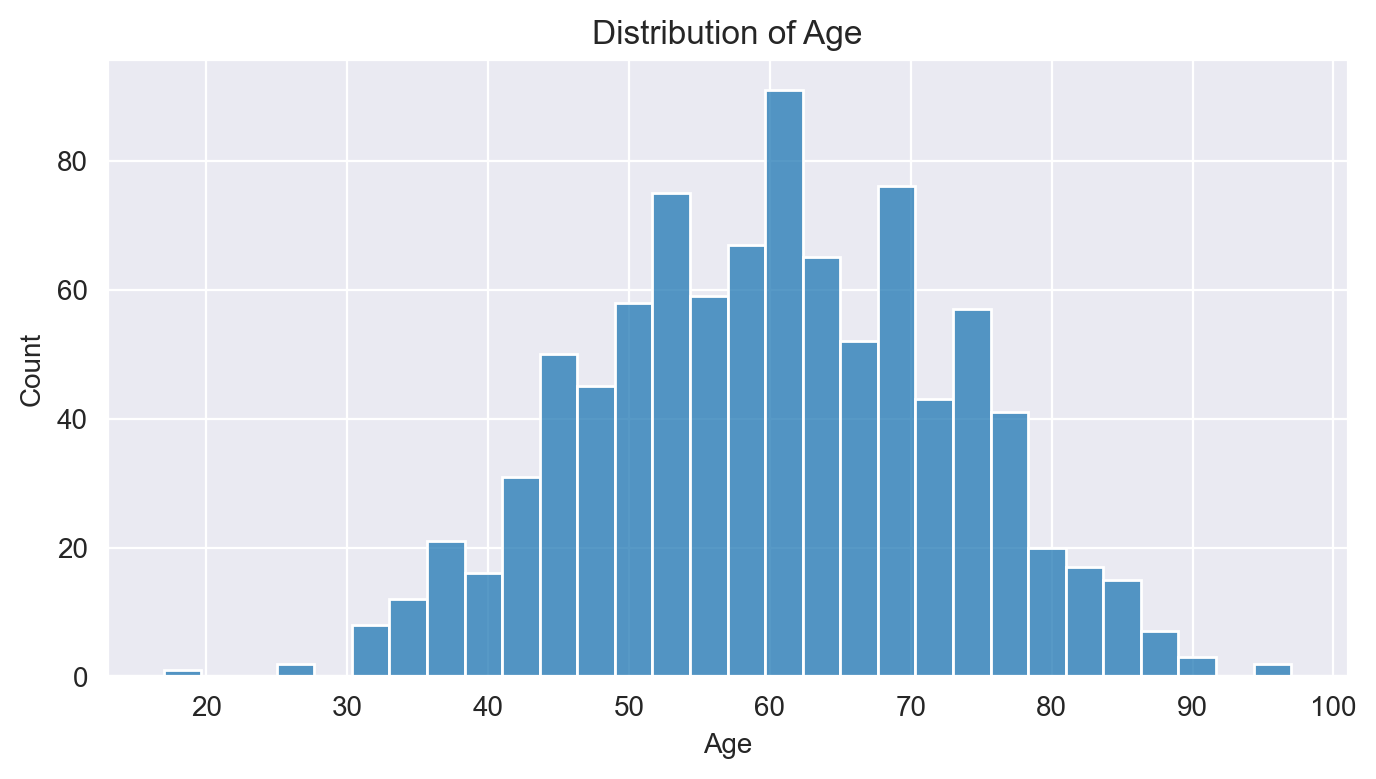

In [58]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?



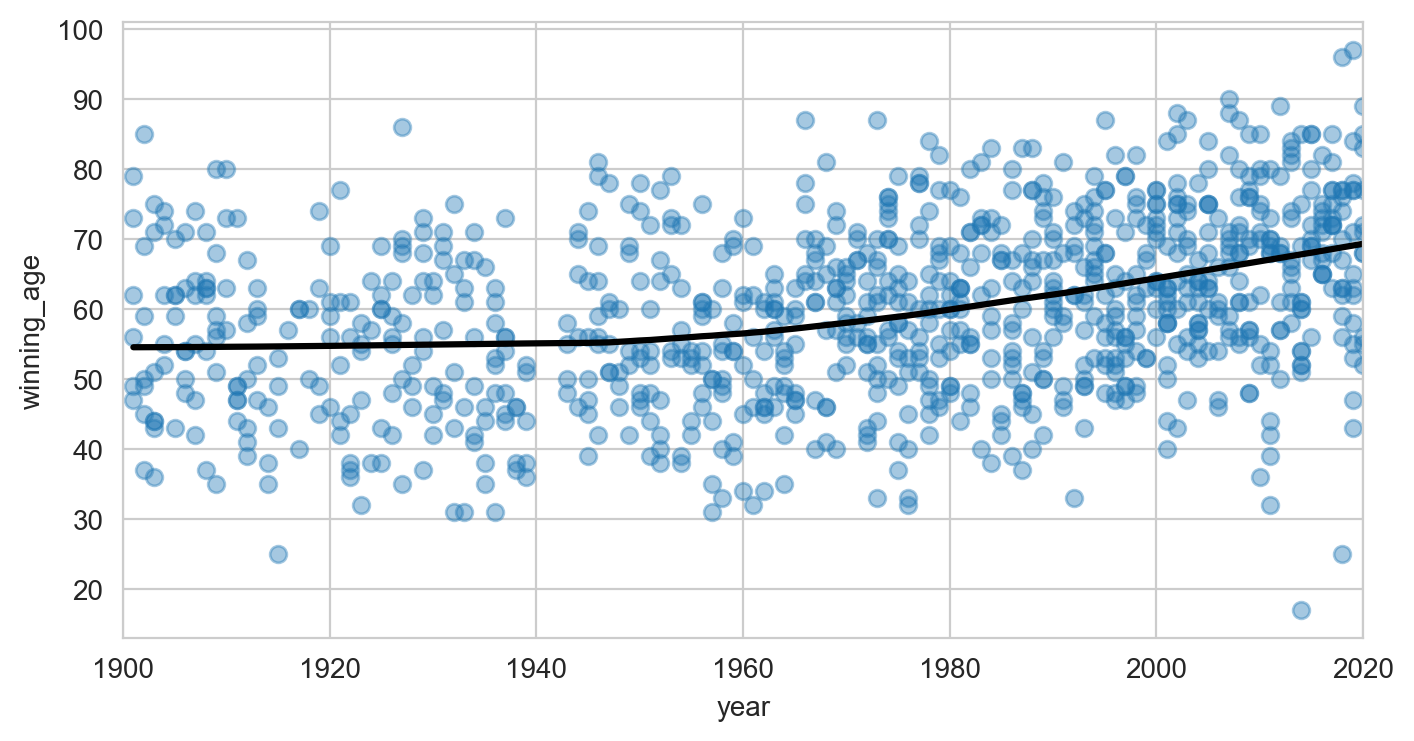

In [59]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    ax = sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True,
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
    ax.set_xlim(1900,2020)
 
plt.show()

### Winning Age Across the Nobel Prize Categories

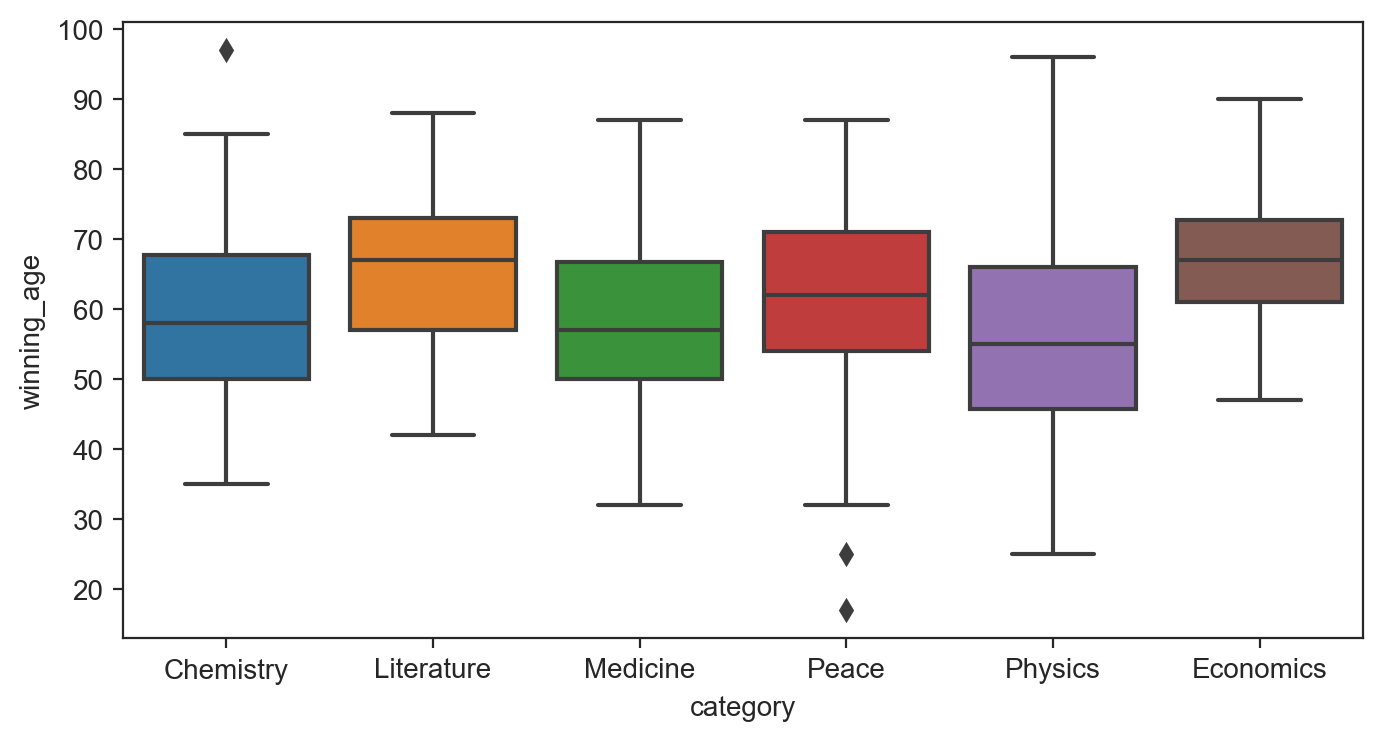

In [60]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("ticks"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
 
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


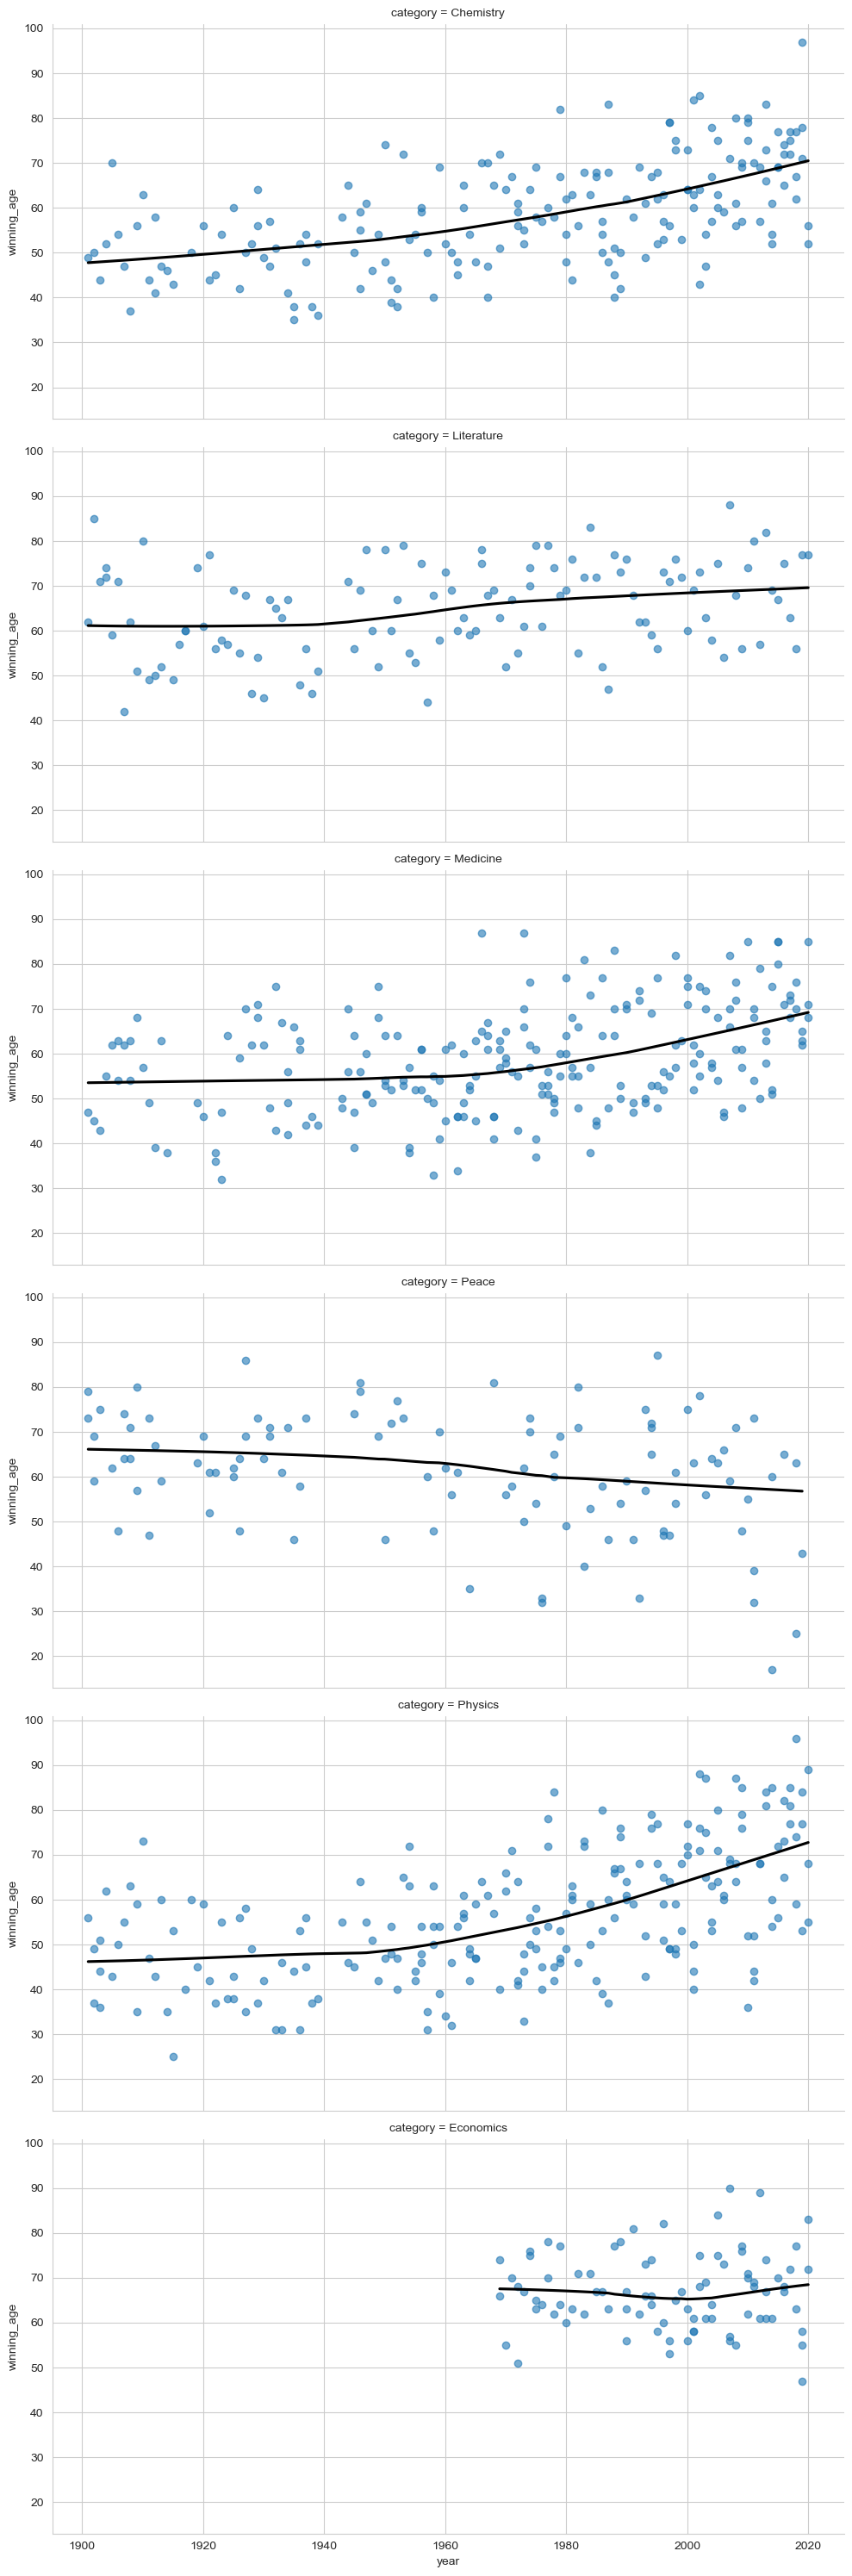

In [61]:
with sns.axes_style('whitegrid'):
    ax = sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

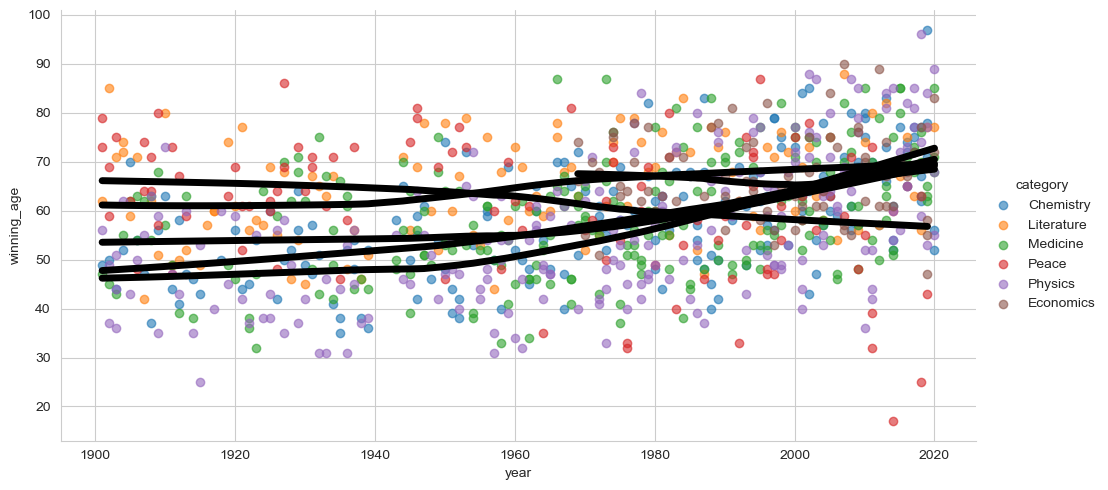

In [62]:
with sns.axes_style('whitegrid'):
    ax = sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               hue = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black','linewidth':5})
 
plt.show()